# MNIST Digit Classification 

## Packeges

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2023-12-06 11:02:28.402506: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 11:02:29.799877: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-06 11:02:43.233088: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:
2023-12-06 11:02:43.233596: W tensorflow/compiler/xla/stream_executor/

## Load Dataset

In [2]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
X_train[0].ptp()

255

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Validation dataset

In [9]:
X_valid = X_train[:5000]
y_valid = y_train[:5000]

In [10]:
X_valid.shape, y_valid.shape

((5000, 28, 28), (5000,))

## Normelization

In [11]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

## Display the images

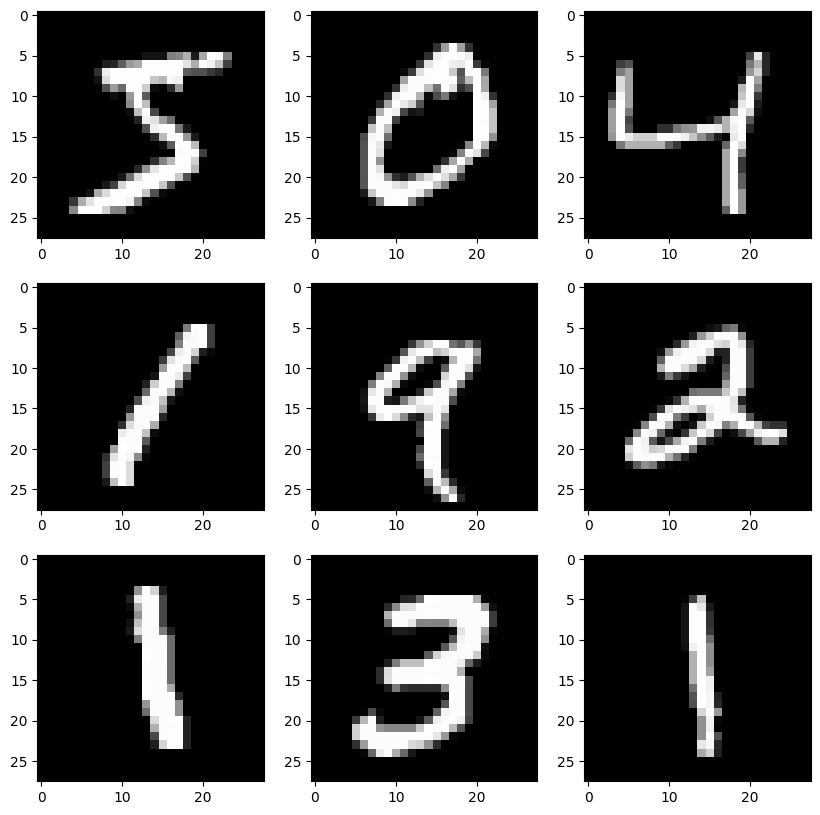

In [12]:
fig, aXes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):        
        aXes[i, j].imshow(X_train[a], cmap=plt.get_cmap('gray'))
        a = a + 1

In [13]:
y_train[0]

5

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

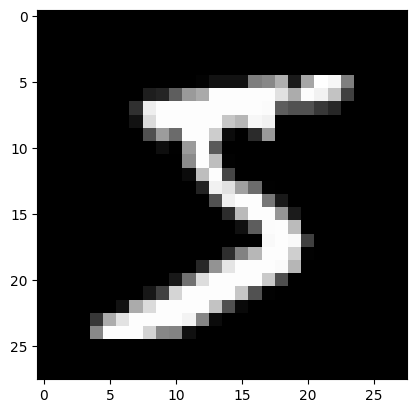

In [15]:
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

## Model prepration

In [71]:
# CNN
# model = keras.models.Sequential()
# model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(keras.layers.MaxPooling2D((2, 2)))
# model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))


In [72]:
# NN
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# sparse_categorical_crossentropy

## Training

In [75]:
epochs = 20
history = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), batch_size=32, epochs=epochs )

Epoch 1/20
1875/1875 [==============================] - 2s 877us/step - loss: 0.5859 - accuracy: 0.8453 - val_loss: 0.2886 - val_accuracy: 0.9206
Epoch 2/20
1875/1875 [==============================] - 2s 878us/step - loss: 0.2787 - accuracy: 0.9213 - val_loss: 0.2227 - val_accuracy: 0.9378
Epoch 3/20
1875/1875 [==============================] - 2s 850us/step - loss: 0.2266 - accuracy: 0.9360 - val_loss: 0.1799 - val_accuracy: 0.9508
Epoch 4/20
1875/1875 [==============================] - 2s 897us/step - loss: 0.1923 - accuracy: 0.9459 - val_loss: 0.1598 - val_accuracy: 0.9586
Epoch 5/20
1875/1875 [==============================] - 2s 904us/step - loss: 0.1672 - accuracy: 0.9523 - val_loss: 0.1322 - val_accuracy: 0.9658
Epoch 6/20
1875/1875 [==============================] - 2s 846us/step - loss: 0.1474 - accuracy: 0.9587 - val_loss: 0.1184 - val_accuracy: 0.9670
Epoch 7/20
1875/1875 [==============================] - 2s 837us/step - loss: 0.1317 - accuracy: 0.9628 - val_loss: 0.1068 -

## Evaluation

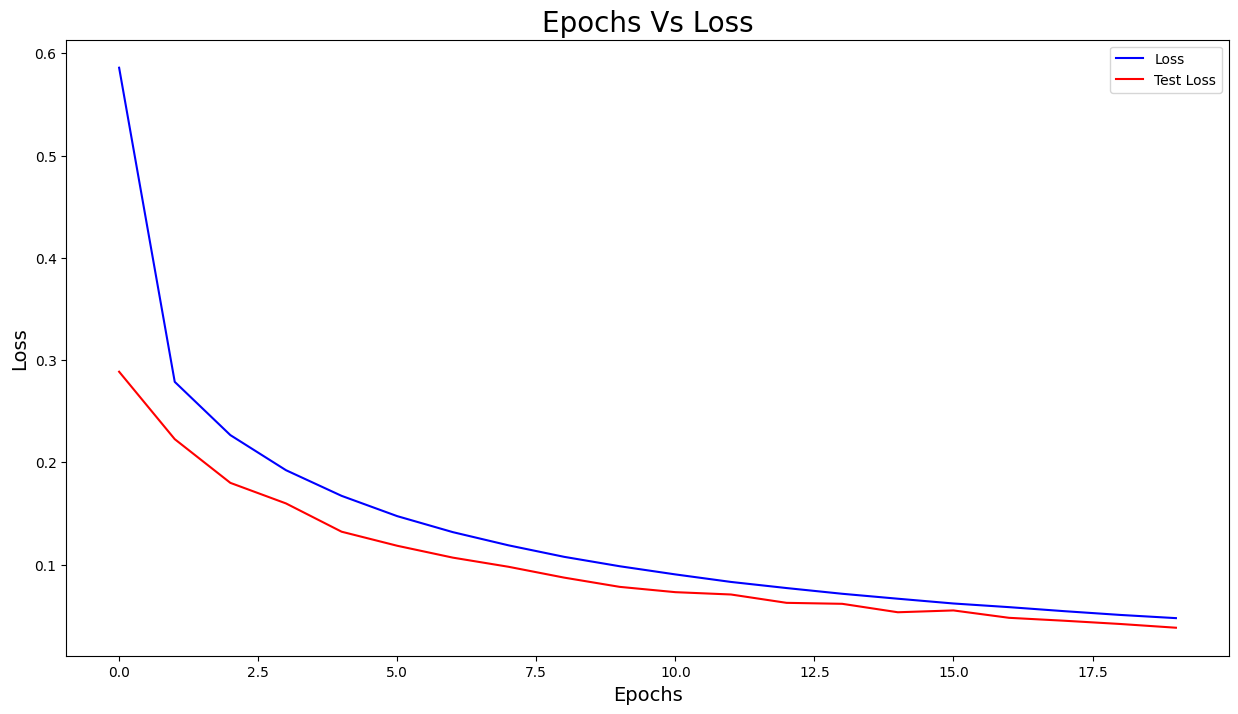

In [76]:
plt.figure(figsize=(15,8))
plt.plot(range(0, epochs), history.history["loss"], color="b", label="Loss")
plt.plot(range(0, epochs), history.history["val_loss"], color="r", label="Test Loss")
plt.title('Epochs Vs Loss', size=20)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.show()

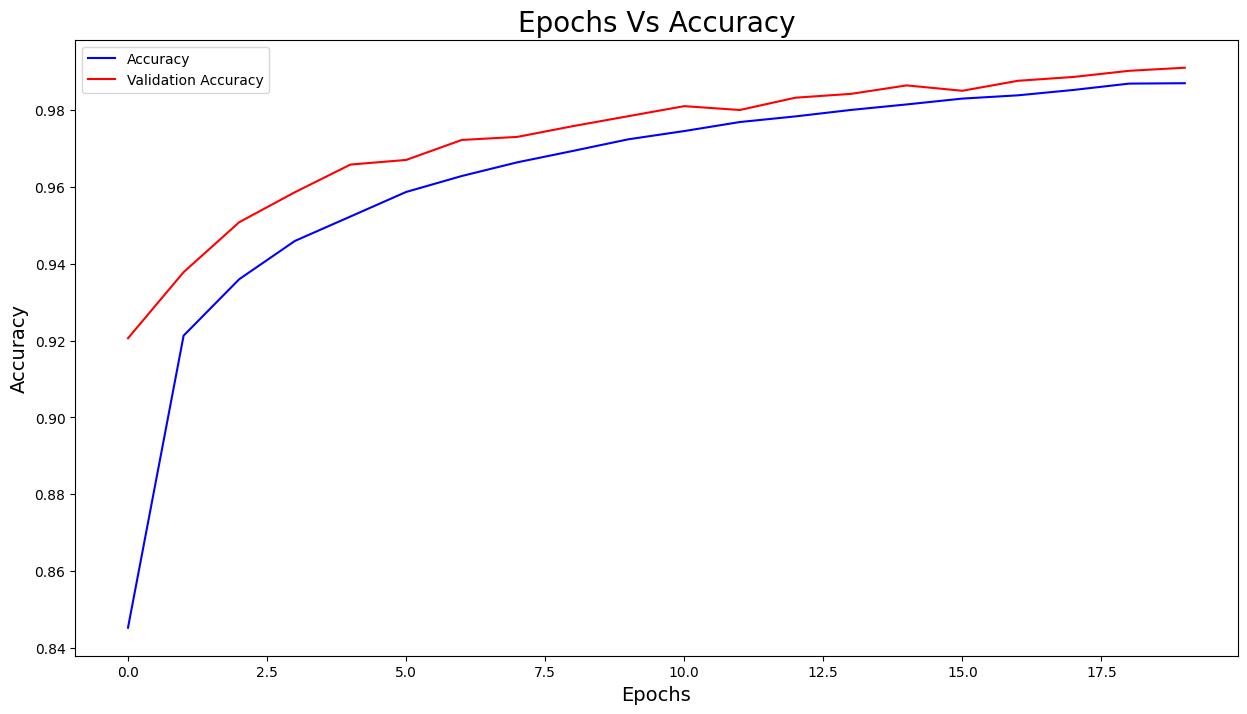

In [77]:
plt.figure(figsize=(15,8))
plt.plot(range(0, epochs), history.history["accuracy"], color="b", label="Accuracy")
plt.plot(range(0, epochs), history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.title('Epochs Vs Accuracy', size=20)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracy', size=14)
plt.legend()
plt.show()

In [78]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 595us/step - loss: 0.0781 - accuracy: 0.9762


[0.07805929332971573, 0.9761999845504761]

In [79]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 [==============================] - 0s 409us/step


array([7, 2, 1, ..., 4, 5, 6])

In [80]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

In [81]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    1,    2,    0,    1,    1,    2,    1],
       [   0, 1123,    3,    1,    0,    1,    3,    0,    4,    0],
       [   4,    2, 1007,    4,    2,    0,    3,    5,    5,    0],
       [   0,    0,    2,  994,    0,    2,    0,    5,    4,    3],
       [   1,    0,    5,    0,  964,    0,    2,    1,    1,    8],
       [   2,    0,    0,    9,    2,  864,    6,    1,    5,    3],
       [   4,    2,    1,    1,    5,    3,  940,    0,    2,    0],
       [   2,    8,   11,    5,    2,    0,    0,  990,    1,    9],
       [   5,    0,    1,    9,    4,    4,    3,    4,  943,    1],
       [   5,    4,    0,    9,   12,    0,    2,    8,    3,  966]],
      dtype=int32)>

In [82]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [83]:
y_classes

array([7, 2, 1, ..., 4, 5, 6])

In [84]:
from sklearn.metrics import precision_score, recall_score

In [85]:
precision_score(y_test, y_classes, average='micro')


0.9762

In [86]:
recall_score(y_test, y_classes, average='micro')

0.9762

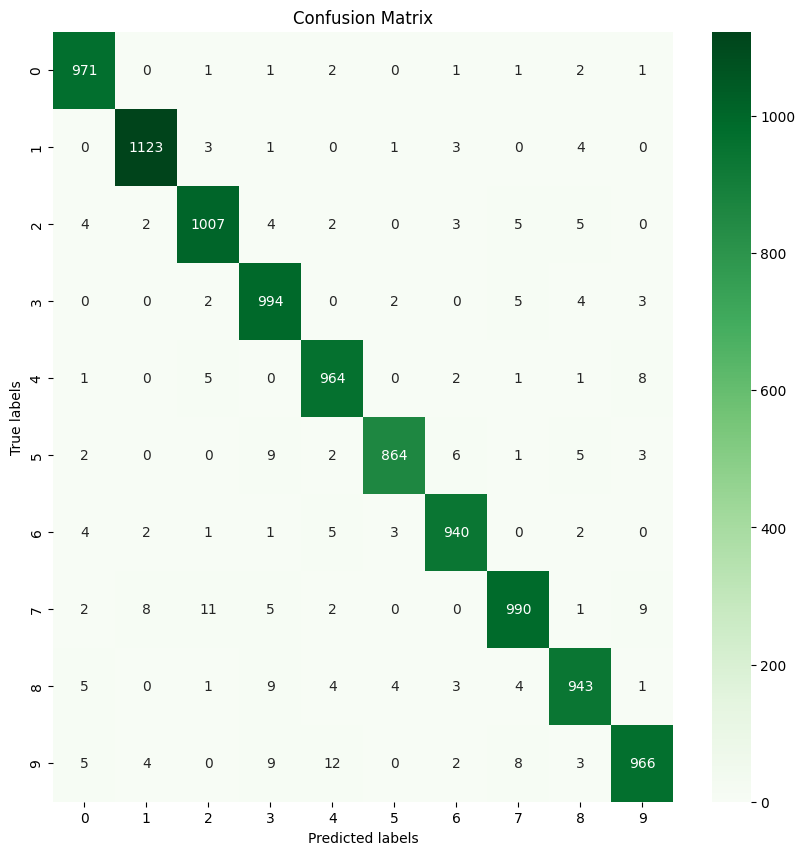

In [87]:
import seaborn as sb   

# ax = plt.figure(figsize=(8, 6))
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)

## Save model

In [88]:
model.save('mnist_nn.h5')

##  Inference

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [90]:
img = cv2.imread('/home/appy1/Downloads/2.jpeg')

In [91]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (21,21), 0)
thresh = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY_INV)[1]

In [92]:
img.shape

(225, 225, 3)

In [93]:
thresh = cv2.resize(thresh, (28,28))

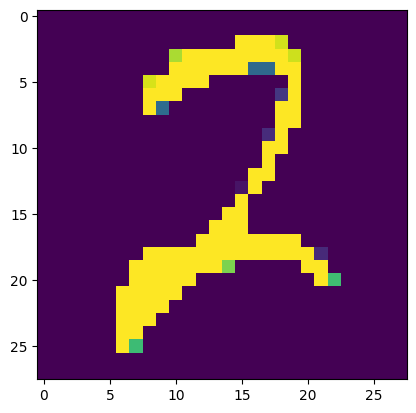

In [94]:
plt.imshow(thresh)

In [95]:
thresh= thresh/255

In [96]:
thresh.shape

(28, 28)

In [97]:
thresh

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.    

In [98]:
im = np.expand_dims(thresh, -1)[None]
im.shape

(1, 28, 28, 1)

In [99]:
cl = model.predict(im)

1/1 [==============================] - 0s 27ms/step


In [100]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [101]:
class_names[np.argmax(cl)]

'2'